# Assessment Problems

## Problem 1: Data from yfinance


https://github.com/ranaroussi/yfinance


In [75]:
# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# Yahoo finance data.
import yfinance as yf


In [76]:
# Tickers:
 # A list of stock symbols used to find data from yfinance

# Get data : 
# The get_data function enables retrieval of pricing snapshots, as well as fundamental and reference data, in a single call.
# See: https://cdn.refinitiv.com/public/rd-lib-python-doc/1.0.0.0/book/en/sections/access-layer/access/get-data-function.html
# period an interval used to obtain historical data

# Download data:
# This function uses the yfinance Python library to download historical stock data.
# See: https://medium.com/%40anjalivemuri97/day-4-fetching-historical-stock-data-with-yfinance-f45f3bd8b9c6
# I use auto_adjust=True, to omit the future warning
# See: https://github.com/ranaroussi/yfinance/blob/0713d9386769b168926d3959efd8310b56a33096/yfinance/utils.py#L445-L462

# DataFrame:
# It’s widely used for data analysis, cleaning, and visualization.Supports filtering, sorting, aggregation, and analysis
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [77]:
# Get historical data for multiple tickers at once:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# Get data:
def get_data(tickers, period="5d", interval="1h"): 
    data = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True) 
    return data
df=get_data(tickers,period="5d", interval="1d")

[*********************100%***********************]  5 of 5 completed


In [78]:
# Saving data into csv file:
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html 

# Date time:
# Used to record the exact date and time
# See: https://docs.python.org/3/library/datetime.html

## Problem 2: Plotting Data

In [79]:
import datetime as dt
import matplotlib.pyplot as plt
import os


In [80]:
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]
def get_data(tickers, period="5d", interval="1h"): 
    data = yf.download(tickers, period=period, interval=interval, group_by='ticker', auto_adjust=True) 
    return data
df=get_data(tickers,period="5d", interval="1d")
df.head()

[*********************100%***********************]  5 of 5 completed


Ticker            AMZN                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-10  248.339996  251.750000  245.589996  248.399994  36476500   
2025-11-11  248.410004  249.750000  247.229996  249.100006  23564100   
2025-11-12  250.240005  250.369995  243.750000  244.199997  31190100   
2025-11-13  243.050003  243.750000  236.500000  237.580002  41401700   
2025-11-14  235.059998  238.729996  232.889999  234.690002  38880000   

Ticker            META                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-11-10  631.090027  635.000000  618.109985  631.760010  19245000  ...   
2025-11-11  628.000000  629.559998  619.390015  627.080017  13302200  ...   
2025-11-12  628.130005  628.989990  607.770020  609.010010  24493300  ...   
2025-11-13  613.070007  617.650024  603.000000  609.890015  20973800  ...   
2025-11-14  601.789978  613.679993  595.200012  609.460022  20679500  ...   

Ticker           GOOGL                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-10  284.420013  290.799988  282.859985  290.100006  29557300   
2025-11-11  287.750000  291.920013  287.320007  291.309998  19842100   
2025-11-12  291.679993  292.010010  283.690002  286.709991  24829900   
2025-11-13  282.339996  282.839996  277.239990  278.570007  29494000   
2025-11-14  271.410004  278.559998  270.700012  276.410004  31106700   

Ticker            AAPL                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2025-11-10  268.959991  273.730011  267.459991  269.429993  41312400  
2025-11-11  269.809998  275.910004  269.799988  275.250000  46208300  
2025-11-12  275.000000  275.730011  271.700012  273.470001  48398000  
2025-11-13  274.109985  276.700012  272.089996  272.950012  49602800  
2025-11-14  271.049988  275.959991  269.600006  272.410004  47399300  

[5 rows x 25 columns]

In [81]:
df.columns

MultiIndex([( 'AMZN',   'Open'),
            ( 'AMZN',   'High'),
            ( 'AMZN',    'Low'),
            ( 'AMZN',  'Close'),
            ( 'AMZN', 'Volume'),
            ( 'META',   'Open'),
            ( 'META',   'High'),
            ( 'META',    'Low'),
            ( 'META',  'Close'),
            ( 'META', 'Volume'),
            ( 'NFLX',   'Open'),
            ( 'NFLX',   'High'),
            ( 'NFLX',    'Low'),
            ( 'NFLX',  'Close'),
            ( 'NFLX', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume')],
           names=['Ticker', 'Price'])

<Axes: xlabel='Date'>

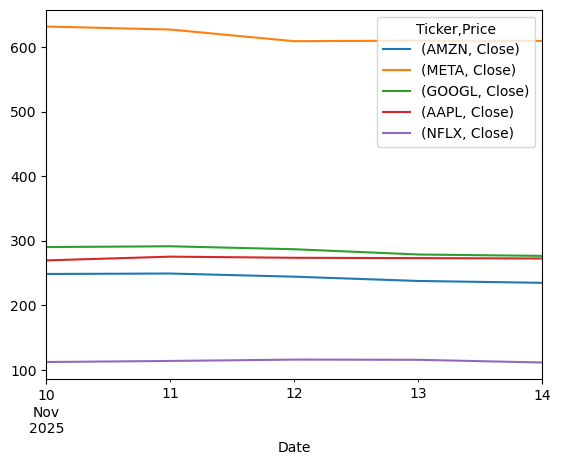

In [82]:
df[[('AMZN', 'Close'),('META', 'Close'),('GOOGL', 'Close'),('AAPL', 'Close'),('NFLX', 'Close')]].plot()


In [83]:
# Save plot
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plot_filename = os.path.join(plots_folder, f"{timestamp}.png")
plt.savefig(plot_filename, dpi=300)  

<Figure size 640x480 with 0 Axes>

## Problem 3: Script

In [84]:
#! /usr/bin/env python

# Dates and time
import datetime as dt

#Yahoo Finance data
import yfinance as yf

# Get data
df=yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOGL"], period="5d", interval="1h")

# Current data and time
now=dt.datetime.now()

# File name
filename="data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv"

# Save data as CSV file
df.to_csv(filename)

C:\Users\jmnic\AppData\Local\Temp\ipykernel_19828\2655439271.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOGL"], period="5d", interval="1h")
[*********************100%***********************]  5 of 5 completed


## Problem 4: Automation

## END